In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
from pandas import read_csv
df = read_csv("survey_results_public.csv")
df.head(500)

# As my database I chose data from Stack Overflow to analyse different aspects of its usage and people who use this website




,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,I agree,I am a developer by profession,18-24 years old,"Employed, full-time;Independent contractor, fr...",Remote,Professional development or self-paced learnin...,"Secondary school (e.g. American high school, G...",Colleague;Friend or family member;Online Cours...,Formal documentation provided by the owner of ...,...,Never,Never,Never,30-60 minutes a day,15-30 minutes a day,DevOps function;Observability tools;Continuous...,"Information Services, IT, Software Development...",Appropriate in length,Easy,269.0
496,497,I agree,I am a developer by profession,55-64 years old,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","School (i.e., University, College, etc)",NaN,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,Less than 15 minutes a day,Automated testing;Continuous integration (CI) ...,"Information Services, IT, Software Development...",Appropriate in length,Easy,155280.0
497,498,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,Never,Never,1-2 times a week,60-120 minutes a day,15-30 minutes a day,DevOps function;Continuous integration (CI) an...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,64254.0
498,499,I agree,I am a de

<BarContainer object of 6 artists>

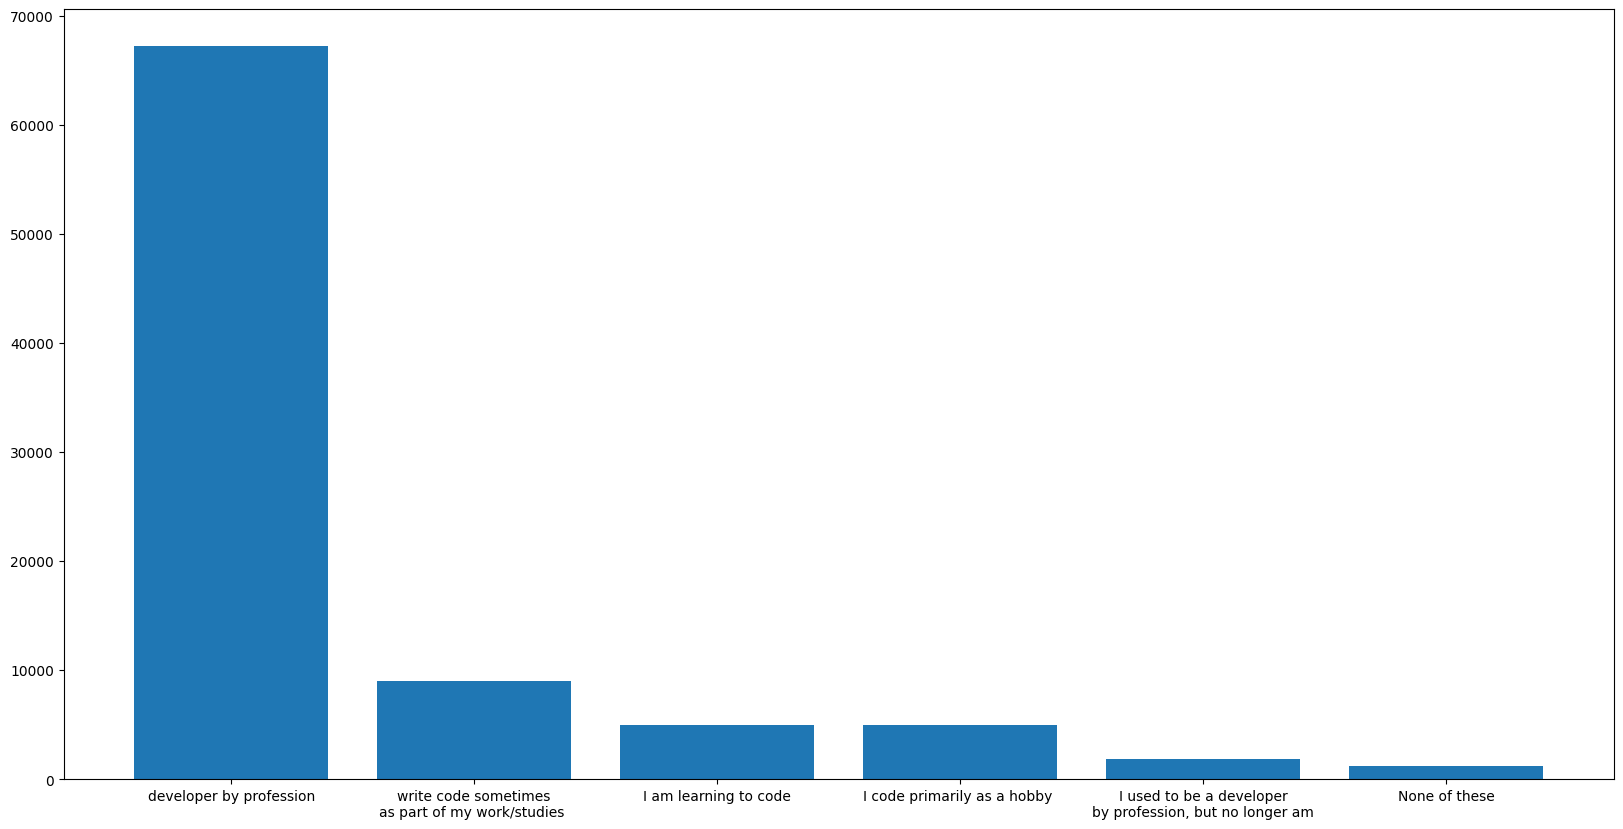

In [3]:
# Firstly I want to see, how many people code professionally

main_branch = ['developer by profession', 'write code sometimes\nas part of my work/studies ', 'I am learning to code', 'I code primarily as a hobby ', 'I used to be a developer\nby profession, but no longer am', 'None of these']

values = df['MainBranch'].value_counts().tolist()


plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=10)

plt.bar(main_branch, values)

# Siginificant amount of users claims to be a developer by profession. It is understendable, because this website is mainly used by programmists for solving their problems




([<matplotlib.patches.Wedge at 0x13d717490>,
 [Text(0.2431621044921751, 1.0727871135220337, '25-34 years old'),
  Text(-1.0284287749344037, -0.3903002112309471, '35-44 years old'),
  Text(0.1256724675418862, -1.0927975251170428, '18-24 years old'),
  Text(0.8828701444973819, -0.6561557040483397, '45-54 years old'),
  Text(1.073098694790691, -0.2417833559997782, '55-64 years old'),
  Text(1.096531722303396, -0.08728219739642615, '65 years or older'),
  Text(1.099438283076182, -0.035149135216923935, 'Under 18 years old'),
  Text(1.0999793951877073, -0.006732767817629068, 'Prefer not to say')])

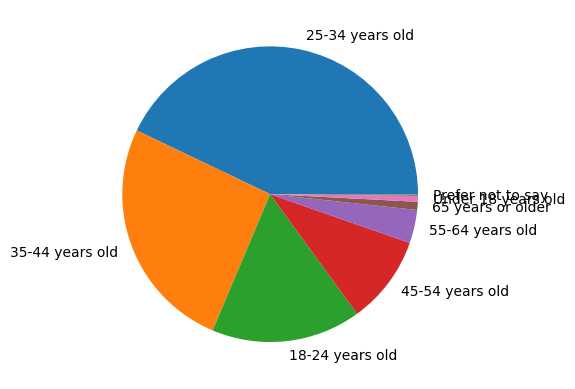

In [4]:
# Secondly I want to check what is the most common age in professional programmists


professional_programmists_df = df[df['MainBranch'] == "I am a developer by profession"]
professional_programmists_ages_df = professional_programmists_df['Age'].value_counts()

ages = ['25-34 years old', '35-44 years old', '18-24 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Under 18 years old', 'Prefer not to say']

plt.pie(professional_programmists_ages_df, labels=ages)

<BarContainer object of 3 artists>

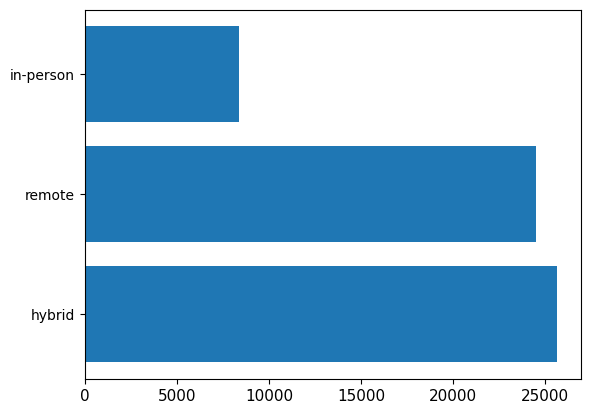

In [103]:
# How many employed developers work: remotely, personally or Hybrid

employed_developers = professional_programmists_df[(professional_programmists_df['Employment'] == "Employed, full-time") |
                                                   (professional_programmists_df['Employment'] == "Independent contractor, freelancer, or self-employed") |
                                                   (professional_programmists_df['Employment'] == "Employed, full-time;Independent contractor, freelancer, or self-employed") |
                                                   (professional_programmists_df['Employment'] == "Employed, part-time")]
employed_developers_work_style= employed_developers['RemoteWork'].value_counts()

labels = ['hybrid', 'remote', 'in-person']

plt.barh(labels, employed_developers_work_style)
# df['Employment'].value_counts()

# as expected, most people work in "hybrid" version. This way it is easier for everyone



<BarContainer object of 8 artists>

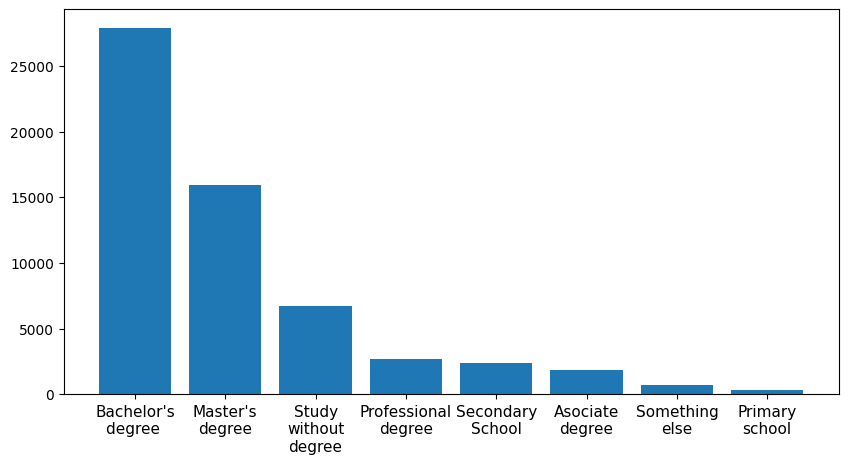

In [106]:
# Here I wanted to show how many people had different education level 

employed_programmists_education = employed_developers['EdLevel']
x = employed_programmists_education.value_counts()

label = ['Bachelor\'s\ndegree ', 'Master\'s\ndegree', 'Study\nwithout\ndegree', 'Professional\ndegree', 'Secondary\nSchool', 'Asociate\ndegree', 'Something\nelse', 'Primary\nschool']

plt.figure(figsize=(10,5))
plt.rc('xtick', labelsize=11)

plt.bar(label, x)

([<matplotlib.patches.Wedge at 0x291103d60>,
 [Text(0.08525982987445571, 1.1468351064602875, "Bachelor's\ndegree "),
  Text(-0.8737350932734482, -0.74772119588951, "Master's\ndegree"),
  Text(0.4000673703788793, -1.0781679364357524, 'Study\nwithout\ndegree'),
  Text(0.873092871107781, -0.7484710003873041, 'Professional\ndegree'),
  Text(1.0424089398916234, -0.4856784965736307, 'Secondary\nSchool'),
  Text(1.1250149413454105, -0.23841430693140608, 'Asociate\ndegree'),
  Text(1.1469663912255457, -0.08347513042246987, 'Something\nelse'),
  Text(1.1498164355417122, -0.02054664347652685, 'Primary\nschool')],
 [Text(0.04819033862469236, 0.6482111471297276, '47.6%'),
  Text(-0.49385027011107935, -0.42262502376363603, '27.3%'),
  Text(0.22612503543154042, -0.6093992684202079, '11.5%'),
  Text(0.49348727497396316, -0.4230488263058675, '4.6%'),
  Text(0.589187661677874, -0.27451393284596515, '4.1%'),
  Text(0.6358780103256667, -0.13475591261340342, '3.2%'),
  Text(0.648285351562265, -0.047181595

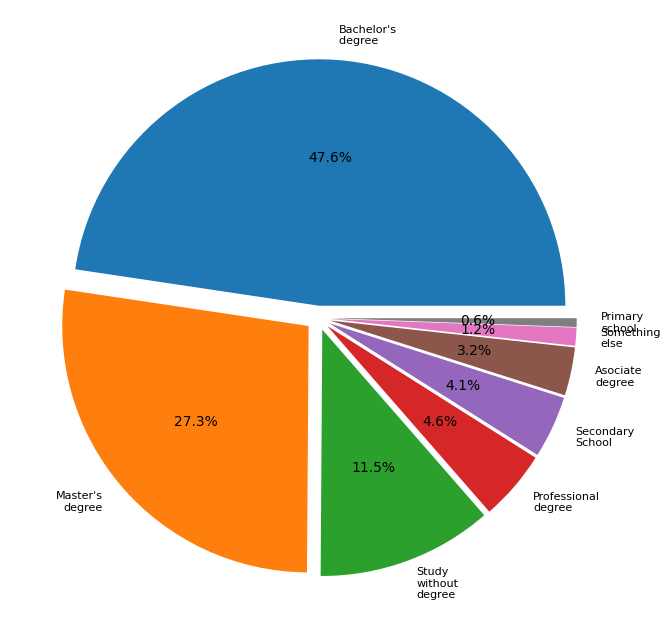

In [119]:
# same data as above, but showed differently

plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=8)
explode = [0.05 for _ in range(0, 8)] 
plt.pie(x, labels=label, explode=explode, autopct='%1.1f%%')

# As we can observe, most employed developers have Bachelor's degree
# 47.7 %, so almost half of the people who answered in the questionnaire that they are empoyed and professional developers have Bachelor's degree 
